# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 1. Простой анализ данных.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="attachment:ai_eval_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `<...>`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* Задача 1 &mdash; 30 баллов
* Задача 2 &mdash; 90 баллов

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad1
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную

#### Тренировочные задачи на библиотеки

Если вы неуверенно себя чувствуете в библиотеках numpy, pandas, matplotlib, seaborn, рекомендуем сначала
* посмотреть материалы по библиотекам на нашем сайте
* прорешать упражнения на библиотеки на странице курса
* прорешать <a href="https://contest.yandex.ru/contest/75090/enter/">два упражнения на numpy</a> в системе Яндекс.Контест.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 9ede240862d9bf1602556040405c317e -->
---
### <font color="blue"><i>Легкая часть</i></font>

### Задача 1

На семинаре мы разбирали классификацию изображений на основе kNN. В этом задании мы вернемся к датасету [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) и попробуем улучшить результат, полученный на семинаре.

Для начала, загрузите данные и разделите их на обучающую и тестовую части.

загрузим необходимые библиотеки.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

Загружаем данные MNIST версиии 1 в виде numpy массивов.

In [4]:
mnist = fetch_openml("mnist_784", version=1, as_frame=False)

X = np.array(mnist['data'])[:3000]
y = np.array(mnist['target'])[:3000]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42
)

Число соседей в модели kNN является необучаемым параметром т.е. гиперпараметром который выставляется вручную. Как мы видели на лекции, выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.

Постройте график зависимости точности (`accuracy_score`) предсказания kNN от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

Перебираем значения k, обучаем модель и вычисляем accuracy.

In [ ]:
k_values = range(1, 21)

train_accuracies = []
test_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))


Построим график.

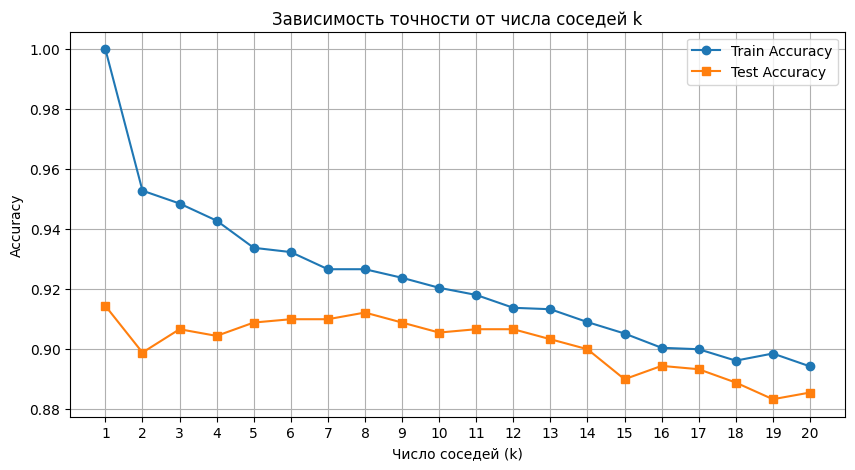

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, train_accuracies, label="Train Accuracy", marker="o")
plt.plot(k_values, test_accuracies, label="Test Accuracy", marker="s")
plt.xlabel("Число соседей (k)")
plt.ylabel("Accuracy")
plt.title("Зависимость точности от числа соседей k")
plt.legend()
plt.grid()
plt.xticks(k_values)
plt.show()

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- fe9171a6e245a953987df27f018c61c2 -->
&#x2753; **Вопрос** &#x2753;

> Почему при $k = 1$ на тренировочной выборке метрика качества составляет 100%.

**Ваш ответ:**

Для любого обучающего примера x из X_train, ближайший сосед в обучающем наборе — это сам этот объект x. То есть, для каждого примера x​ ближайшим соседом является он сам.

Таким образом, для каждого примера в обучающей выборке x​, модель всегда правильно классифицирует объект, потому что она сравнивает его с самим собой, и это всегда будет точное совпадение.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- cdb15caec1719ca7ba80d25b716879ca -->
Помимо числа соседей гиперпараметром модели также является *метрика расстояния* между объектами.

> По умолчанию используется *Евклидова метрика* ($L_2$), согласно которой расстояние между двумя точками $x_1 =(x_{11}, …, x_{1d})$ и $x_2=(x_{21},…,x_{2n})$ в $d$-мерном пространстве определяется как:
$$\rho(x_1, x_2) = \sqrt{\sum^d_{j=1}\left(x_{1j} - x_{2j}\right)^2}.$$
>
> Иногда в kNN имеет смысл использовать другие метрики, например *метрику Манхэттена* ($L_1$).
$$\rho(x_1, x_2) = \sum^d_{j=1} \left|x_{1j} - x_{2j}\right|.$$
>
> Выбор одной из них зависит от особенностей задачи и данных. В частности,
>
> * метрика Манхэттена менее чувствительна к выбросам, чем евклидово расстояние, что делает её полезной для данных с сильным шумом или при наличии аномалий;
>
> * в задачах с разреженными данными (например, текстовые данные, представленные в виде векторов) метрика Манхэттена может работать лучше, чем евклидово расстояние.

Проведите аналогичный эксперимент используя в качестве гиперпараметра $L_1$-метрику (выясните сами, как ее задать). Выведите на одном графике зависимости точности (accuracy) от значения $k$ для обучающей и тестовой выборок для обоих метрик.

In [ ]:
k_values = range(1, 21)

accuracy_train_L2 = []
accuracy_test_L2 = []
accuracy_train_L1 = []
accuracy_test_L1 = []

Выполняем эксперимент для L2 (евклидова метрика) и L1 (манхэттенская метрика)

In [ ]:
for k in k_values:

    model_L2 = KNeighborsClassifier(n_neighbors=k, metric='euclidean')
    model_L2.fit(X_train, y_train)

    y_train_pred_L2 = model_L2.predict(X_train)
    accuracy_train_L2.append(accuracy_score(y_train, y_train_pred_L2))

    y_test_pred_L2 = model_L2.predict(X_test)
    accuracy_test_L2.append(accuracy_score(y_test, y_test_pred_L2))

    model_L1 = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    model_L1.fit(X_train, y_train)

    y_train_pred_L1 = model_L1.predict(X_train)
    accuracy_train_L1.append(accuracy_score(y_train, y_train_pred_L1))

    y_test_pred_L1 = model_L1.predict(X_test)
    accuracy_test_L1.append(accuracy_score(y_test, y_test_pred_L1))

Строим график.

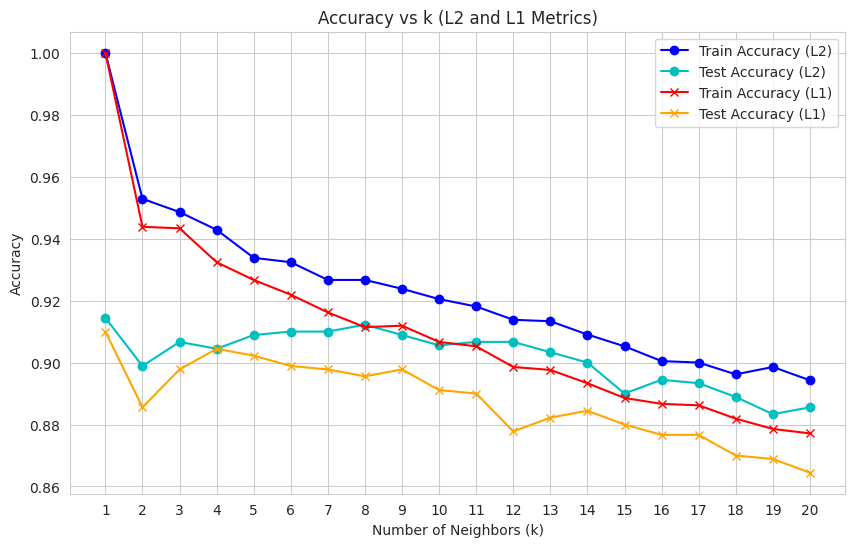

In [ ]:
plt.figure(figsize=(10, 6))

plt.plot(k_values, accuracy_train_L2, label="Train Accuracy (L2)", marker='o', color='b')
plt.plot(k_values, accuracy_test_L2, label="Test Accuracy (L2)", marker='o', color='c')

plt.plot(k_values, accuracy_train_L1, label="Train Accuracy (L1)", marker='x', color='r')
plt.plot(k_values, accuracy_test_L1, label="Test Accuracy (L1)", marker='x', color='orange')

plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs k (L2 and L1 Metrics)")
plt.legend()
plt.grid(True)

plt.xticks(k_values)

plt.show()

&#x2754; **Вопрос** &#x2754;

> Как вы думаете почему смена метрики так сильно повлияла на характер кривых?

**Ваш ответ:** L2 метрика может быть более чувствительной к большому количеству мелких отклонений в данных, так как она учитывает квадрат отклонений по всем осям. Это может приводить к более сильным колебаниям на меньших значениях k. L1 метрика может приводить к более "грубым" решениям, поскольку она не столь чувствительна к изменениям в больших значениях признаков, что может как повышать, так и понижать точность.

**Выводы:**

Когда мы строим графики зависимости точности от значения k , мы можем наблюдать, как изменяется производительность модели для разных значений k. Если выбрать одну метрику, мы можем увидеть, как точность на тренировочной выборке увеличивается с уменьшением k (модель начинает больше "запоминать"), но точность на тестовой выборке снижается, когда k (за исключением k = 1, при k = 1 достигается максимум кривой) становится слишком малым (модель слишком заучивает данные и теряет способность обобщать).

С другой стороны, если поменять метрику, например, на манхэттенскую, то кривая точности может измениться, потому что модель будет иначе воспринимать "похожие" данные. Это может изменить баланс между переобучением и недообучением и повлиять на общую точность на тестовой выборке.

Стоит отметить, что при больших k модель начинает учитывать слишком много точек, включая те, что находятся далеко от классифицируемой точки. Это приводит к переобобщению и уменьшению точности.

Для L2-метрики точность на тренировочной и на тестовой выборке выше чем для L1-метрики.

Таким образом, метрика не только влияет на то, какие объекты считаются похожими, но и влияет на способность модели к обобщению и запоминанию данных. Для нашей тестовой выборки больше подходит L2-метрика.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 00000000000000000000000000000000 -->


---

### Задача 2

Перед выполнением задачи рекомендуется посмотреть <a href="https://thetahat.ru/courses/ad/main/1/main_sem_kNN">материал</a> с семинара.

#### 0. Подготовка данных

Титаник был крупнейшим пассажирским судном в 1912—1913 годах. Во время первого рейса затонул в северной Атлантике, столкнувшись с айсбергом в ночь с 14 на 15 апреля 1912 года, при этом погибло 1502 из 2224 пассажиров и членов экипажа. Данные о пассажирах были собраны в таблицы, которые можно скачать с <a href="https://www.kaggle.com/c/titanic/data" target="_blank">Kaggle</a>. Эти данные часто используются в качестве обучающих в анализе данных.


Загрузите данные с помощью `pandas`.

In [ ]:
titanic = pd.read_csv("train.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Для лучшего понимания процесса работы с данными, уточним ключевые термины.

> **Объект** — это единица данных, представленная набором признаков и используемая для обучения или предсказаний модели. В данной задаче являются пассажиры, им соответствуют *строки* таблицы данных.
>
> **Признаки (features)** — это характеристики, которые описывают объекты в данных. В таблицах данных они обычно соответствуют *колонкам*. В данной задаче мы будем работать со следующими признаками
>
> * `Pclass` — класс билета (1 = первый класс, 2 = второй класс, 3 = третий класс);
>
> * `Age` — возраст пассажира;
>
> * `SibSp` — количество братьев, сестер или супругов на борту;
>
> * `Parch` — количество родителей или детей на борту;
>
> * `Fare` — стоимость билета.
>
> **Таргет (target)** — это целевая переменная, которую мы хотим предсказать. В данной задаче мы будем предсказывать `Survived` — бинарная переменная, указывающая, выжил ли пассажир (1) или нет (0). Значения этой переменной имеются для обучающего набора данных, а для тестого — нет.

Из каждой части оставим несколько признаков, с которыми мы будем работать, а также отдельно &mdash; целевой признак, который мы хотим предсказать.

In [ ]:
features_columns = ["Pclass", "Age", "Sex", "SibSp", "Parch", "Fare"]
target_column = "Survived"  # Целевой признак

X, y = titanic[features_columns], titanic[target_column]

В данных могут присутствовать пропуски. Пока что мы не умеем с ними работать, так что исключим из данных.

Посмотрите, сколько объектов имеют хотя бы один пропуск. Удалите их из данных.

In [ ]:
missing_values = X.isna().sum()
print("Количество пропущенных значений в каждом столбце:\n", missing_values)

X_clean = X.dropna()
y_clean = y[X_clean.index]

print("\nОставшиеся пропуски после удаления:", X_clean.isna().sum().sum())
print("\nКоличество оставшихся объектов:", X_clean.shape[0])

Количество пропущенных значений в каждом столбце:
 Pclass      0
Age       177
Sex         0
SibSp       0
Parch       0
Fare        0
dtype: int64

Оставшиеся пропуски после удаления: 0

Количество оставшихся объектов: 714


Разделите данные по строкам на две части случайным образом в соотношении 7:3. Первую часть мы будем называть *обучающей*, а вторую &mdash; *тестовой*.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X_clean, y_clean, test_size=0.3, random_state=42
)

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 371b31e8ca86989a98cce342afcbbf2a -->
#### 1. Исследование

> &#x2757; **Внимание.** Эта часть задачи должна выполняться *исключительно на обучающих данных*. За использование тестовых данных решение не будет оценено.

Проведите визуальный анализ данных чтобы понять, как различные признаки влияют на целевой. Исследовать можно не целиком обучающие данные, а разделить их на две части по одному из признаков, а далее рассматривать каждую часть отдельно.

*Не забывайте про информативность и эстетичность графиков, посмотрите презентацию про оформление домашних заданий.*

Переписываем пол в виде чисел.

In [ ]:
sns.set_style("whitegrid")

X_train["Sex"] = X_train["Sex"].map({"male": 0, "female": 1})


Распределение выживших в зависимости от класса (Pclass)

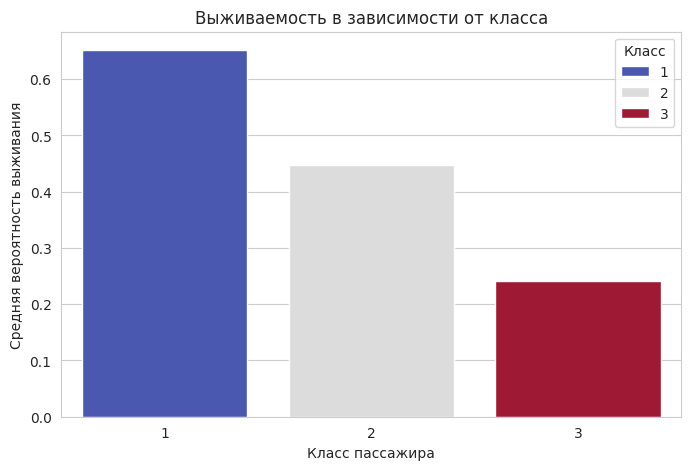

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Pclass", y=y_train, data=X_train, errorbar=None, hue="Pclass", palette="coolwarm")
plt.xlabel("Класс пассажира")
plt.ylabel("Средняя вероятность выживания")
plt.title("Выживаемость в зависимости от класса")
plt.legend(title="Класс")
plt.show()

Влияние пола на выживаемость

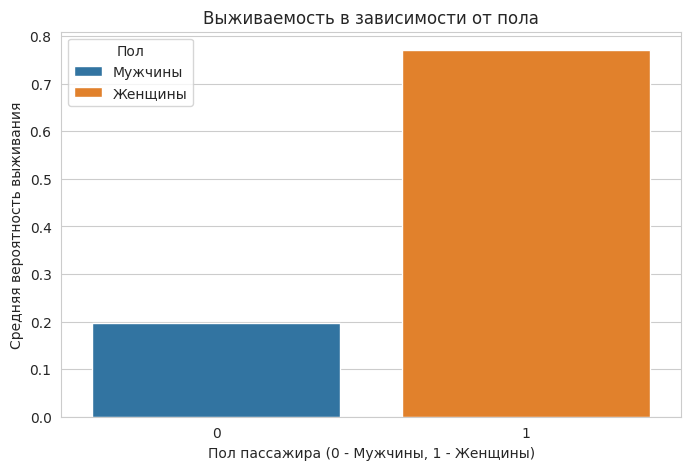

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="Sex", y=y_train, data=X_train, errorbar=None, hue="Sex")  # Убираем palette
plt.xlabel("Пол пассажира (0 - Мужчины, 1 - Женщины)")
plt.ylabel("Средняя вероятность выживания")
plt.title("Выживаемость в зависимости от пола")
plt.legend(title="Пол", labels=["Мужчины", "Женщины"])
plt.show()

Распределение возраста среди выживших и погибших.

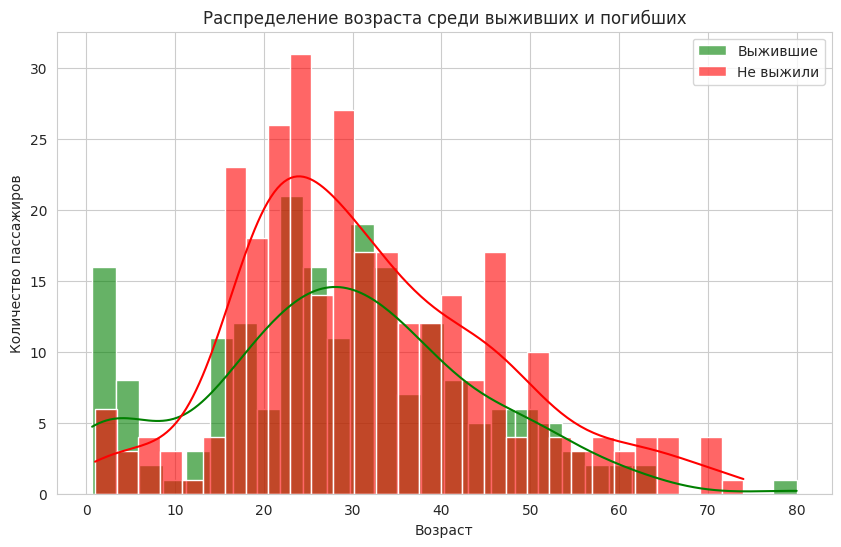

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(X_train.loc[y_train == 1, "Age"], bins=30, kde=True, color="green", label="Выжившие", alpha=0.6)
sns.histplot(X_train.loc[y_train == 0, "Age"], bins=30, kde=True, color="red", label="Не выжили", alpha=0.6)
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.title("Распределение возраста среди выживших и погибших")
plt.legend()
plt.show()

Влияние количества родственников на борту (SibSp).

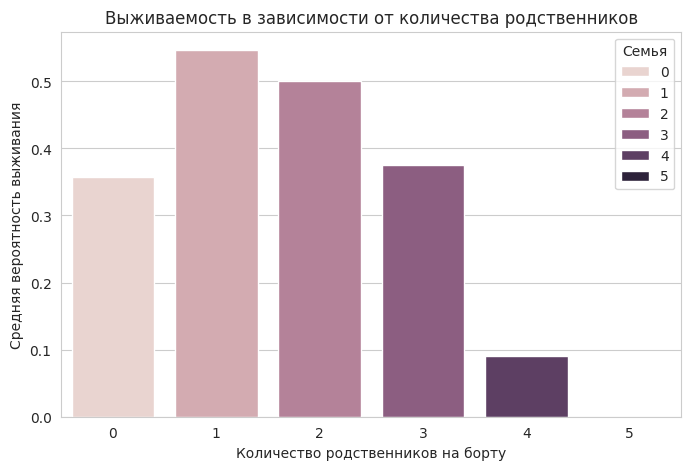

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(x="SibSp", y=y_train, data=X_train, errorbar=None, hue="SibSp")
plt.xlabel("Количество родственников на борту")
plt.ylabel("Средняя вероятность выживания")
plt.title("Выживаемость в зависимости от количества родственников")
plt.legend(title="Семья")
plt.show()


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 476dce11b8cac8705a10bff695e4cdee -->
#### 2. Классификация логическими правилами

На основе выше проведенного исследования предложите два разных правила в виде решающего дерева, пример которого можете посмотреть в презентации с первой лекции (классификация котиков). Никакие статистические методы использовать не требуется, только логику и графики. Любые решения "из коробки" использовать запрещено. Например, достаточно пояснения "*по графику (описание графика) визуально я увидел, что при X > 100 большинство пассажиров выжило, поэтому использую правило (описание правила)*".

В данной задаче достаточно, если первое дерево будет иметь максимальную глубину 2, а второе &mdash; глубину 1, и при этом не является поддеревом первого. Дерево из одного листа имеет глубину 0.

*Указание*. Попросите ИИ красиво оформить описание дерева и его пояснение.

**Дерево 1:**

 Дерево:

Если Sex == female: выжил
Если Sex == male:

    Если Pclass == 1: выжил
    Если Pclass == 3: не выжил
    Если Pclass == 2: выжил

Пояснение:

    Если пассажир был женщиной (Sex == female), то он выжил.

    Если пассажир был мужчиной (Sex == male), то:
        Если его класс билета был 1 (Pclass == 1), он выжил.
        Если его класс билета был 3 (Pclass == 3), он не выжил.
        Если его класс билета был 2 (Pclass == 2), он выжил.

**Дерево 2:**


Дерево:

Если Sex == female: выжил <br>
Если Sex == male: не выжил <br>
Пояснение:

    Если пол пассажира мужской, то скорее всего он не выжил.

    Если пол пассажира женский, то скорее всего она выжила.

Реализуйте полученные деревья по шаблону

Первое дерево.

In [ ]:
def tree_1(features: pd.DataFrame) -> pd.Series:
    predicted = pd.Series(index=features.index, dtype=int)

    predicted[features['Sex'] == 'female'] = 1

    predicted[(features['Sex'] == 'male') & (features['Pclass'] == 1)] = 1
    predicted[(features['Sex'] == 'male') & (features['Pclass'] == 3)] = 0
    predicted[(features['Sex'] == 'male') & (features['Pclass'] == 2)] = 1

    predicted.fillna(0, inplace=True)

    return predicted

Второе дерево.

In [ ]:
def tree_2(features: pd.DataFrame) -> pd.Series:
    predicted = features["Sex"].map({"female": 1, "male": 0})

    return predicted

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 509cca15393d5b0fb3cf40b463d12077 -->
Проверьте работоспособность данных моделей на тестовой выборке и оцените качество модели по метрике `accuracy`.

> &#x2755; *Примечание.* Полученные значения не влияют на оценку по заданию. Оценивается только корректность и обоснованность решения, а также графики и выводы.

In [ ]:
def accuracy(target: pd.Series, predicted: pd.Series) -> float:
    correct_predictions = (target == predicted).sum()

    return correct_predictions / len(target)

In [ ]:

predictions_1 = tree_1(X_test)

predictions_2 = tree_2(X_test)

accuracy_1 = accuracy(y_test, predictions_1)
print(f"Accuracy для первого дерева: {accuracy_1:.4f}")

accuracy_2 = accuracy(y_test, predictions_2)
print(f"Accuracy для второго дерева: {accuracy_2:.4f}")

Accuracy для первого дерева: 0.6651
Accuracy для второго дерева: 0.7535


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 2bf781f25f8969f7e712ea5d28d608a3 -->
#### 3. Классификация методом ближайшего соседа

В данной части задачи оставим только признаки `'Pclass'`, `'Age'`, `'Sex'`,`'Fare'`.


&#x2753; **Вопрос** &#x2753;
> Какие могли бы возникнуть проблемы при использовании признаков `'SibSp'`, `'Parch'`? Имеется ли подобная проблема для признака `'Pclass'`?

**Ваш ответ:** Высокая корреляция между 'SibSp' и 'Parch': Оба признака описывают семейные связи пассажира. Это уменьшает стабильность модели, так как схожие значения признаков могут повлиять на оценки коэффициентов, что усложняет интерпретацию модели.

Нечеткость различий: 'SibSp' и 'Parch' не всегда отражают важные различия в контексте выживаемости. Например, пассажир с 1 братом и пассажир с 1 родителем могут иметь схожие шансы на выживание, несмотря на различия в этих признаках.

<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3bfbe10cf933e1302c2f524a99acfa54 -->
Постройте классификатор методом ближайшего соседа. Обучите его и оцените качество модели. Сравните с предыдущим методом.

Пока никаких преобразований данных делать не нужно.




In [ ]:
features_columns = ['Pclass', 'Age', 'Sex', 'Fare']
target_column = 'Survived'

titanic['Age'] = titanic['Age'].fillna(titanic['Age'].median())
titanic['Fare'] = titanic['Fare'].fillna(titanic['Fare'].median())

le = LabelEncoder()
titanic['Sex'] = le.fit_transform(titanic['Sex'])

X = titanic[features_columns]
y = titanic[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn = KNeighborsClassifier(n_neighbors=5)

knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy (KNN): {accuracy:.4f}")


Accuracy (KNN): 0.6828


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 21227e76b996f62c6c83ee38ce486bdf -->
Попробуем улучшить результаты предсказаний, для этого надо сначала посмотреть на сами данные. Выведите значение минимального и максимального объекта для каждого признака.

In [ ]:
min_values = titanic[["Pclass", "Age", "Sex", "Fare"]].min()
max_values = titanic[["Pclass", "Age", "Sex", "Fare"]].max()

print("Минимальные значения:")
print(min_values)

print("\nМаксимальные значения:")
print(max_values)

Минимальные значения:
Pclass    1.00
Age       0.42
Sex       0.00
Fare      0.00
dtype: float64

Максимальные значения:
Pclass      3.0000
Age        80.0000
Sex         1.0000
Fare      512.3292
dtype: float64


Как мы видим данные в каждом столбце распределены очень по-разному.

&#x2753; **Вопрос** &#x2753;
> Как это может повлиять на работу kNN, почему?

**Ваш ответ:**  ...


Для решения этой проблемы нужно привести признаки к единому масштабу. Существует много методов масштабирования рассмотрим работу одного из них &mdash; **минимаксная нормализация**

  
> **Минимакс** &mdash; линейное преобразование данных в диапазоне $[0, 1]$, где минимальное и максимальное масштабируемые значения соответствуют 0 и 1 соответственно.
> Реализуется оно по следующей формуле:
>
> $$\widetilde{x}_{ij} = \frac{x_{ij} - m_j}{M_j - m_j}$$
>
> где $x_{ij}$ &mdash; значение признака $j$ для объекта $i$, а $m_j$ и $M_j$ &mdash; минимальное и максимальное значения признака $j$ в обучающем наборе данных.  
> В модуле `sklearn.preprocessing` есть [класс](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) `MinMaxScaler`, который реализует эту операцию. Давайте рассмотрим методы этого класса подробнее:
>
> * `fit(X)`: вычисляет минимальные и максимальные значения для каждого признака.
>
> * `transform(X)`: применяет масштабирование к данным.
>
> * `fit_transform(X)`: объединяет оба метода, сначала подгоняя модель, а затем трансформируя данные.
>
> * `inverse_transform(X)`: восстанавливает исходные данные из масштабированных.


Стоит отметить что существуют и другие методы масштабирования данных.

&#x2753; **Вопрос** &#x2753;
> В чем может быть недостаток такого метода масштабирования?

**Ваш ответ:** Различные масштабы признаков могут повлиять на работу kNN, поскольку он вычисляет расстояния между объектами. Признаки с большими значениями (например, Fare, максимальное значение 512) будут доминировать в расчете расстояния, а признаки с меньшими значениями (например, Sex, значения 0 или 1) окажут меньшее влияние.

Это может исказить результаты классификации, так как алгоритм будет больше ориентироваться на признаки с большими диапазонами значений.

Чтобы решить эту проблему, следует нормализовать данные, чтобы все признаки имели одинаковый масштаб.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 3cf8b0b6b0402c9ceb439c2de6ee4276 -->


Отмасштабируйте данные

In [ ]:
features = ['Pclass', 'Age', 'Sex', 'Fare']

scaler = MinMaxScaler()

titanic[features] = scaler.fit_transform(titanic[features])

print(titanic[features].head())

   Pclass       Age  Sex      Fare
0     1.0  0.271174  1.0  0.014151
1     0.0  0.472229  0.0  0.139136
2     1.0  0.321438  0.0  0.015469
3     0.0  0.434531  0.0  0.103644
4     1.0  0.434531  1.0  0.015713


Теперь выведите значения максимума и минимума нормализованных признаков. Обратите внимание `MinMaxScaler` возвращается объект в виде `np.ndarray`.

In [ ]:
print("Минимальные значения после нормализации:")
print(titanic[features].min())

print("\nМаксимальные значения после нормализации:")
print(titanic[features].max())

Минимальные значения после нормализации:
Pclass    0.0
Age       0.0
Sex       0.0
Fare      0.0
dtype: float64

Максимальные значения после нормализации:
Pclass    1.0
Age       1.0
Sex       1.0
Fare      1.0
dtype: float64


Обучите модель и сравните результат предсказаний со стандартизацией и без.

In [ ]:
features = ['Pclass', 'Age', 'Sex', 'Fare']
target = 'Survived'
X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic[target], test_size=0.3, random_state=42)


scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn.fit(X_train_scaled, y_train)
y_pred_scaled = knn.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)

print(f'Accuracy с нормализацией: {accuracy_scaled}')

Accuracy с нормализацией: 0.8171641791044776


**Вывод:** Accuracy 0.6828 без стандартизации и 0.8172 со стандартизацией. Таким образом,
стандартизация влияет на качество
предсказаний модели в нашем случае качество увеличилось.

А можем ли мы как-то еще повысить точность модели?

Как мы видели, параметр k числа соседей является необучаемым т.е. гиперпараметром,
который выставляется вручную.
Выбор оптимального значения k важен, так как слишком маленькое значение может
привести к переобучению, а слишком большое — к недообучению.


<!-- Внимание! Здесь находится специальная отметка. Ее нельзя удалять! Ответы на вопросы / выводы для предыдущего пункта(ов) пиши в ячейках выше! -->
<!-- 02a5bc7d6f2e8382a04db099c58ba6d1 -->
**А можем ли мы как-то еще повысить точность модели?**

Как мы видели, параметр $k$ числа соседей является необучаемым т.е. гиперпараметром, который выставляется вручную. Выбор оптимального значения $k$ важен, так как слишком маленькое значение может привести к переобучению, а слишком большое — к недообучению.



Постройте график зависимости точности (`accuracy_score`) от значения $k$ (от 1 до 20) для обучающей и тестовой выборок.

In [ ]:
titanic[features] = titanic[features].fillna(titanic[features].median())
X_train, X_test, y_train, y_test = train_test_split(titanic[features], titanic[target], test_size=0.3, random_state=42)

train_accuracies = []
test_accuracies = []

k_range = range(1, 21)


Обучение модели и расчет точности для каждого k

In [ ]:
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)

    # Обучаем модель
    knn.fit(X_train, y_train)

    # Предсказания для обучающей и тестовой выборки
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Сохраняем точности
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

Строим график.

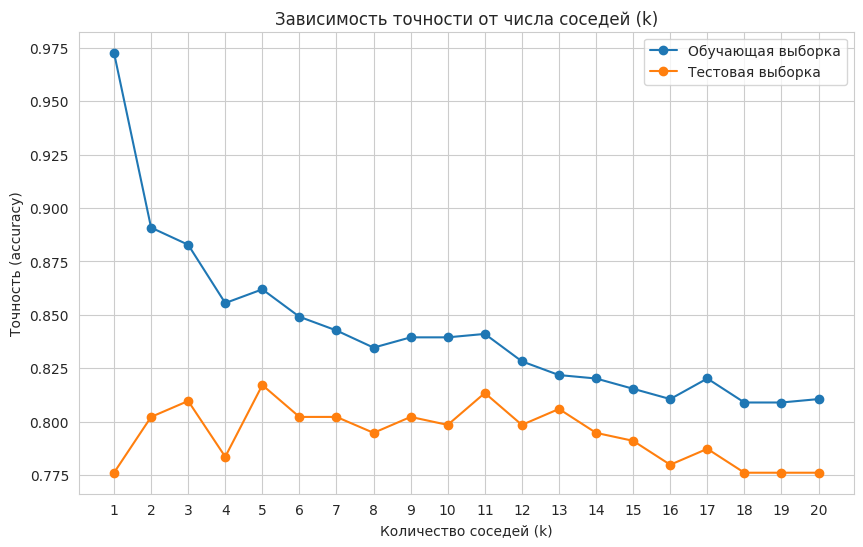

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(k_range, train_accuracies, label='Обучающая выборка', marker='o')
plt.plot(k_range, test_accuracies, label='Тестовая выборка', marker='o')
plt.xlabel('Количество соседей (k)')
plt.ylabel('Точность (accuracy)')
plt.title('Зависимость точности от числа соседей (k)')
plt.legend()
plt.grid(True)
plt.xticks(k_range)
plt.show()

Печатаем точность для k=5.

In [ ]:
k_5_index = k_range.index(5)
print(f"Точность на обучающей выборке при k=5: {train_accuracies[k_5_index]:.4f}")
print(f"Точность на тестовой выборке при k=5: {test_accuracies[k_5_index]:.4f}")

Точность на обучающей выборке при k=5: 0.8620
Точность на тестовой выборке при k=5: 0.8172


**Вывод:** При k = 5 точность достигает максимума на тестовой выборке 0.817. При k=5 точность модели достигает максимума, что означает:

    Оптимальное количество соседей: k=5 дает лучшие результаты для предсказания выживаемости пассажиров.
    Баланс между переобучением и недообучением: Этот параметр избегает как переобучения (слишком маленькое k), так и недообучения (слишком большое k).
